## Pandas

In [1]:
import numpy as np
import pandas as pd
pd.__version__
pd.set_option("display.notebook_repr_html", False)

In [2]:
np.random.seed(123)
pd.DataFrame({
        #key - column names
        #value - column vals
        "A" : np.round(np.random.uniform(0,1,5),2),
        "C" : np.random.choice([True,False],5, True, [0.4,0.6]),
        "B" : ["f", None, "f", "m", "f"]
    })

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True

In [3]:
A = np.r_[:12].reshape(4,3)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
pd.DataFrame(A,columns=["A","B","C"])

   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [5]:
pairs = [
    ("A", np.r_[8,3,4]),
    ("B", range(3)),
    ("C",["aaa","bbb","ccc"])
]
pd.DataFrame.from_items(pairs)

   A  B    C
0  8  0  aaa
1  3  1  bbb
2  4  2  ccc

In [6]:
pd.DataFrame(pairs)

   0                1
0  A        [8, 3, 4]
1  B        (0, 1, 2)
2  C  [aaa, bbb, ccc]

In [7]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
birth_dates.head()

KeyboardInterrupt: 

In [8]:
np.random.seed(123)
x = pd.DataFrame({
        #key - column names
        #value - column vals
        "A" : np.round(np.random.uniform(0,1,5),2),
        "C" : np.random.choice([True,False],5, True, [0.4,0.6]),
        "B" : ["f", None, "f", "m", "f"]
    })
print(x)

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True


In [9]:
x.shape

(5, 3)

In [10]:
for e in x:
    # iterating over dateframes - iterating over column names
    print(e)

A
B
C


In [11]:
x.dtypes

A    float64
B     object
C       bool
dtype: object

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
A    5 non-null float64
B    4 non-null object
C    5 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 165.0+ bytes


## Series

In [13]:
x["A"]

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [14]:
type(x["A"])

pandas.core.series.Series

In [15]:
x.A # with this notation, column can't be added, x["A"] must be used

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [16]:
# Check the difference between a dataframe with a single column and a series
pd.DataFrame(x.A)

      A
0  0.70
1  0.29
2  0.23
3  0.55
4  0.72

In [17]:
pd.Series(np.r_[np.nan, 0:1:4j])

0         NaN
1    0.000000
2    0.333333
3    0.666667
4    1.000000
dtype: float64

In [18]:
x.A.values

array([ 0.7 ,  0.29,  0.23,  0.55,  0.72])

## date-time data

In [19]:
pd.Series(pd.date_range("2017-01-30",periods=3)) # default freq = "D"

0   2017-01-30
1   2017-01-31
2   2017-02-01
dtype: datetime64[ns]

In [20]:
pd.Series(pd.date_range("2017-01-30 10:30",periods=5, freq="60S"))

0   2017-01-30 10:30:00
1   2017-01-30 10:31:00
2   2017-01-30 10:32:00
3   2017-01-30 10:33:00
4   2017-01-30 10:34:00
dtype: datetime64[ns]

In [21]:
pd.Series(pd.date_range("2017","2018", freq="3M"))

0   2017-01-31
1   2017-04-30
2   2017-07-31
3   2017-10-31
dtype: datetime64[ns]

In [22]:
# Exercise
# Using the birth_date dataframe, find a function that converts dates to datetime objects
birth_dates["Dates"] = pd.to_datetime(birth_dates["BirthDate"])

NameError: name 'birth_dates' is not defined

In [ ]:
birth_dates.dtypes

## Categorical data
on nominal (qualitative) or ordinal (ordered) scale

In [ ]:
x.B # Male or Female

In [ ]:
x["B"] = pd.Series(x["B"], dtype="category") # equivalent to x.B.astype("category)
x["B"]

In [ ]:
x.B.cat.codes # categpries are encoded with integers => saves RAM

In [ ]:
x.B.cat.categories

In [ ]:
p = pd.Series(pd.Categorical(
    ["a","c","b","a","a","c"],
        categories = ["a","b","c"],
        ordered = True    
        ))
p

In [ ]:
p.sort_values()

In [ ]:
p.cat.categories = ["S","M","L"]
p

In [ ]:
x.A

In [ ]:
pd.cut(x.A, np.r_[0,0.5,1], right=False)

In [ ]:
pd.cut(x.A, np.r_[0,0.5,1], right=False, labels =["small","large"])

In [ ]:
# categorical variables are used if we have #unique values << #observations
# we save space
# we save time (processing ints is faster than processing strings)
# we can set an arbitrary linear order on the set labels
# int representation might be convenient

tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv", comment='#')
tips.head()

In [ ]:
tips.sex.head()

In [ ]:
tips["sex"] = tips["sex"].astype("category")

In [ ]:
tips.sex.dtype

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(100*tips.tip/tips.total_bill,tips.sex)
plt.plot()

## Index

In [ ]:
x

In [ ]:
x.index

In [ ]:
x.columns

In [ ]:
y = x.set_index(np.linspace(0,1,5))
y

In [ ]:
y.index= ["a1","a2","a3","a4","a5"]
y

In [ ]:
y.index.is_monotonic, y.index.is_unique

In [ ]:
x.index.name ="ROWS"
x.columns.name="COLUMNS"
x

In [ ]:
# Exercise
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv", comment="#")
flights.head(2)

In [ ]:
# set index to consist of years and months
# Easy way
flights.set_index('year','month').head(14)

In [ ]:
# set index to consist of years and months
# Manual way


tuples = [(y,m) for y,m in  zip(flights.year,flights.month)]

flights2 = flights.copy()
flights2.index = pd.MultiIndex.from_tuples(
    tuples
)
flights2.index.names = ["year","month"]
flights2 = pd.DataFrame(flights2.passengers)
flights2.head(14)

## Indexing (subsetting) Series and DataFrame objects

In [ ]:
np.random.seed(123)
b = pd.Series(np.round(np.random.uniform(0,1,10),2))
i = np.r_[0:10]
np.random.shuffle(i)
b.index = i
b

In [ ]:
c = b.copy()
c.index = ["a","b","c","d","e","f","g","h","i","j"]
c

In [ ]:
# never do this
b[0:1] # Index based

In [ ]:
print(b[0]) # label based
b[ [0,1] ]

In [ ]:
b[0:5:2]

In [ ]:
b[b.values > 0.7]

In [ ]:
# loc (label) and iloc (positional) attributes
b.loc[0]

In [ ]:
b.iloc[0]

In [ ]:
b.iloc[1:7]

In [ ]:
b.loc[1:7]

In [ ]:
c.loc["c":"g"]

In [ ]:
c.loc["c":"a":-1]

In [ ]:
c.loc[ c.values > 0.7 ]

In [ ]:
c.iloc[ c.values > 0.7 ] # equivalent

In [ ]:
b.loc[ [1,3,5] ]

In [ ]:
b.iloc[ [1,3,5] ]

In [ ]:
c.loc[["a","b","c"]]

In [ ]:
birth_dates2 = pd.DataFrame(birth_dates.Name)
birth_dates2.set_index(pd.to_datetime(birth_dates["BirthDate"]),inplace=True)
birth_dates2.head()

In [ ]:
birth_dates2.loc["1918-12-31"]

In [ ]:
birth_dates2.loc["1918-12-31":"1925-01-01"]

In [ ]:
# Get the names of people at least 16 year old
def can_consume_alcohol(d,today,y):
    # d - dataframe like birth_date2
    # today - a string like "2017-01-30"
    # y - age limit to consume alcohol
    date = pd.to_datetime(today)
    which =  ((date.year > d.index.year + y) |
            ((date.year == d.index.year + y) & (date.month > d.index.month)) |
            ((date.year == d.index.year + y) & (date.month == d.index.month) & (date.day >= d.index.day))
            )
    return d.iloc[which]

def old_enough(d,today,y):
    # d - dataframe like birth_date2
    # today - a string like "2017-01-30"
    # y - age limit to consume alcohol
    which = d.index <= pd.to_datetime(today) - pd.tseries.offsets.DateOffset(years=y)
    return d.iloc[which]

np.all(can_consume_alcohol(birth_dates2, "2016-12-05",16) ==  old_enough(birth_dates2, "2016-12-05",16))

In [ ]:
flights.iloc[:4,0]

In [ ]:
flights.loc[:,"year"].iloc[::12]

In [ ]:
tips.head()

In [ ]:
tips.loc[:,"sex":"day"].head()

In [ ]:
# Exercise: partition tips
# create 2 dataframe: tips_train (80%) and tips_test (20%)
which = np.random.choice([True,False],tips.shape[0],True,[.8,.2])
tips_train = tips[which]
tips_test = tips[~which]
print(tips.shape[0], tips_train.shape[0], tips_test.shape[0], tips.shape[1], tips_train.shape[1], tips_test.shape[1])

# Option 2
i = np.random.permutation(np.arange(tips.shape[0]))
k = int(len(i)*0.8)
tips_train = tips.iloc[i[:k]]
tips_test = tips.iloc[i[k:]]
print(tips.shape[0], tips_train.shape[0], tips_test.shape[0], tips.shape[1], tips_train.shape[1], tips_test.shape[1])

# Option 3
tips_train = tips.sample(frac=0.8, random_state=123)
tups_test = tips.iloc[~tips.index.isin(tips_train.index)]
print(tips.shape[0], tips_train.shape[0], tips_test.shape[0], tips.shape[1], tips_train.shape[1], tips_test.shape[1])


In [ ]:
tips.loc[tips.tip>5.0,:]

In [ ]:
tips.loc[tips.sex=="Male",:]
tips.loc[(tips.total_bill<20) & (tips.total_bill>10),:]
tips.loc[((tips.day == "Sun") | (tips.day == "Sat")) & (tips.tip>5)]

In [ ]:
# Create new row
x.loc[9] = [0.4,"m",True]
x

In [ ]:
# Remove row
x.drop([9], axis=0)

In [ ]:
2*x.A

In [ ]:
# Same result as above, does labelwise operation
x.A + x.A.iloc[ [3,2,0,1,4] ]

In [ ]:
x.A.iloc[1:] + x.A.iloc[:-1]

In [ ]:
x.A.iloc[1:].values + x.A.iloc[:-1].values

In [ ]:
x.A + pd.Series([10,100,1000], index=[0,0,0])

In [ ]:
np.exp(x.A)

In [ ]:
x.A.apply(lambda v: "t" if v > 0.5 else "f")

In [ ]:
tips.groupby("sex").mean()

In [ ]:
tips.groupby(["sex","smoker"]).mean()

In [ ]:
tips.sex.value_counts()

In [ ]:
pd.pivot_table(tips, values=["total_bill", "tip"],
              index =["day","sex"],aggfunc="median")

In [ ]:
pd.crosstab(tips.smoker,tips.sex)

In [9]:
weather = pd.read_csv("./nycflights13_weather.csv.gz", comment = "#")
weather.head(2)

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  

In [10]:
# Convert temperature to celsius
weather["tempC"] = (weather.temp - 32) * 5 / 9
weather.head(2)

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   

   wind_gust  precip  pressure  visib            time_hour  tempC  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00    2.8  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00    2.8  

In [11]:
# Compute daily mean temperature
res = []
for i in range(len(weather)):
    res.append(pd.datetime(weather.year[i],weather.month[i],weather.day[i]))
               
weather["date"] = pd.Series(res,name="Date")

means = weather[["date","tempC"]].groupby("date").mean()
means.head()

               tempC
date                
2013-01-01  3.813043
2013-01-02 -1.833333
2013-01-03 -1.308333
2013-01-04  1.254167
2013-01-05  2.845833

In [12]:
# alternative
daily_means = weather.loc[:,["tempC", "month", "day"]].groupby(["month","day"]).mean()
daily_means.head()

              tempC
month day          
1     1    3.813043
      2   -1.833333
      3   -1.308333
      4    1.254167
      5    2.845833

In [13]:
# Choose days with greater mean temperature than the preceding day
res = [False]
for i in range(1,len(means)):
    res.append(means.tempC[i]>means.tempC[i-1])
means["hotter"] = pd.Series(res,name ="hotter",index=means.index)
means.head()

               tempC hotter
date                       
2013-01-01  3.813043  False
2013-01-02 -1.833333  False
2013-01-03 -1.308333   True
2013-01-04  1.254167   True
2013-01-05  2.845833   True

In [17]:
# alternative
means.tempC[means.tempC.diff(1) > 0]

date
2013-01-03    -1.308333
2013-01-04     1.254167
2013-01-05     2.845833
2013-01-06     3.541667
2013-01-07     5.425000
2013-01-09     5.450000
2013-01-10     7.236111
2013-01-12     7.288889
2013-01-14    10.415278
2013-01-17     4.533333
2013-01-19     3.233333
2013-01-20     7.684722
2013-01-24    -7.723611
2013-01-25    -7.629167
2013-01-26    -6.126389
2013-01-27    -3.536111
2013-01-28    -0.436111
2013-01-29     4.380556
2013-01-30     7.598611
2013-01-31     9.680556
2013-02-03    -2.855556
2013-02-04    -2.297222
2013-02-05    -1.511111
2013-02-06     0.995833
2013-02-08     0.902778
2013-02-11     3.055556
2013-02-12     5.669444
2013-02-14     3.687500
2013-02-15     5.261111
2013-02-19     3.277778
                ...    
2013-11-06    11.754167
2013-11-07    14.248611
2013-11-10     9.858333
2013-11-14     4.984722
2013-11-15     8.145833
2013-11-16    10.279167
2013-11-17    11.845833
2013-11-18    15.680556
2013-11-21     4.862500
2013-11-22    11.283333
2013-11-26 

In [14]:
# Find the 5 hottest days
means.sort_values(by="tempC", ascending=False)[:5]

                tempC hotter
date                        
2013-07-19  32.233333   True
2013-07-18  31.395833   True
2013-07-20  30.912500  False
2013-07-17  30.719444   True
2013-07-16  30.548611   True

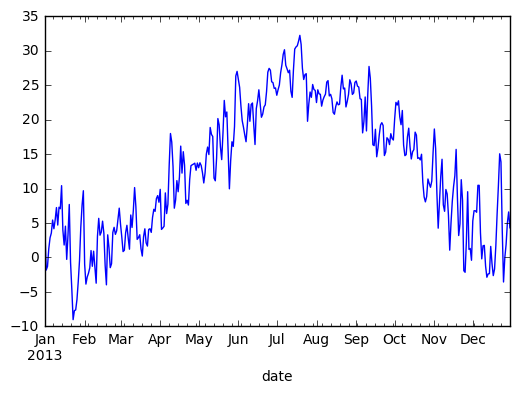

In [21]:
means.tempC.plot()
plt.show()

## Exercises

In [23]:
# Load the data
weather = pd.read_csv("./nycflights13_weather.csv.gz", comment = "#")
airlines = pd.read_csv("./nycflights13_airlines.csv.gz", comment = "#")
planes = pd.read_csv("./nycflights13_planes.csv.gz", comment = "#")
flights = pd.read_csv("./nycflights13_flights.csv.gz", comment = "#")
airports = pd.read_csv("./nycflights13_airports.csv.gz", comment = "#")

     Using pure Pandas, produce outputs similar to the following sql statements
    1. `SELECT DISTINCT engine FROM planes`
    2. `SELECT DISTINCT type, engine FROM planes`
    3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
    4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`
    5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

In [42]:
import sqlite3
conn = sqlite3.connect("/tmp/nycflights13.db")
airports.to_sql("airports", conn)
flights.to_sql("flights",conn)
weather.to_sql("weather",conn)
planes.to_sql("planes",conn)
airlines.to_sql("airlines",conn)

### 1

In [112]:
pd.DataFrame(planes.engine.unique(),columns=["engine"])

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [65]:
pd.read_sql_query(
"""
SELECT DISTINCT engine FROM planes
""", conn)

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

### 2

In [118]:
planes.loc[:,["type","engine"]].drop_duplicates().reset_index(drop=True)

                       type         engine
0   Fixed wing multi engine      Turbo-fan
1   Fixed wing multi engine      Turbo-jet
2  Fixed wing single engine  Reciprocating
3   Fixed wing multi engine  Reciprocating
4  Fixed wing single engine        4 Cycle
5                Rotorcraft    Turbo-shaft
6   Fixed wing multi engine     Turbo-prop

In [67]:
pd.read_sql_query(
"""
SELECT DISTINCT type, engine FROM planes
""", conn)

                       type         engine
0   Fixed wing multi engine      Turbo-fan
1   Fixed wing multi engine      Turbo-jet
2  Fixed wing single engine  Reciprocating
3   Fixed wing multi engine  Reciprocating
4  Fixed wing single engine        4 Cycle
5                Rotorcraft    Turbo-shaft
6   Fixed wing multi engine     Turbo-prop

### 3

In [119]:
pd.DataFrame(planes.engine.value_counts())

               engine
Turbo-fan        2750
Turbo-jet         535
Reciprocating      28
Turbo-shaft         5
Turbo-prop          2
4 Cycle             2

In [147]:
pd.read_sql_query(
"""
SELECT COUNT(*), engine FROM planes GROUP BY engine
""", conn)

   COUNT(*)         engine
0         2        4 Cycle
1        28  Reciprocating
2      2750      Turbo-fan
3       535      Turbo-jet
4         2     Turbo-prop
5         5    Turbo-shaft

### 4

In [120]:
planes.pivot_table(index=["engine","type"],values="engines",aggfunc=len).reset_index()

          engine                      type  engines
0        4 Cycle  Fixed wing single engine        2
1  Reciprocating   Fixed wing multi engine        5
2  Reciprocating  Fixed wing single engine       23
3      Turbo-fan   Fixed wing multi engine     2750
4      Turbo-jet   Fixed wing multi engine      535
5     Turbo-prop   Fixed wing multi engine        2
6    Turbo-shaft                Rotorcraft        5

In [121]:
planes.groupby(["engine",'type']).size().reset_index()

          engine                      type     0
0        4 Cycle  Fixed wing single engine     2
1  Reciprocating   Fixed wing multi engine     5
2  Reciprocating  Fixed wing single engine    23
3      Turbo-fan   Fixed wing multi engine  2750
4      Turbo-jet   Fixed wing multi engine   535
5     Turbo-prop   Fixed wing multi engine     2
6    Turbo-shaft                Rotorcraft     5

In [72]:
pd.read_sql_query(
"""
SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type
""", conn)

   COUNT(*)         engine                      type
0         2        4 Cycle  Fixed wing single engine
1         5  Reciprocating   Fixed wing multi engine
2        23  Reciprocating  Fixed wing single engine
3      2750      Turbo-fan   Fixed wing multi engine
4       535      Turbo-jet   Fixed wing multi engine
5         2     Turbo-prop   Fixed wing multi engine
6         5    Turbo-shaft                Rotorcraft

### 5

In [122]:
max_ = pd.groupby(planes[['year','engine','manufacturer']],by=['engine','manufacturer']).max()
min_ = pd.groupby(planes[['year','engine','manufacturer']],by=['engine','manufacturer']).min()
avg_ = pd.groupby(planes[['year','engine','manufacturer']],by=['engine','manufacturer']).mean()
res = pd.concat([min_,avg_,max_],axis=1)
res.columns=["min","avg","max"]
res.reset_index()

           engine                   manufacturer     min          avg     max
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0
1         4 Cycle                    JOHN G HESS     NaN          NaN     NaN
2   Reciprocating          AMERICAN AIRCRAFT INC     NaN          NaN     NaN
3   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
4   Reciprocating                  BARKER JACK L     NaN          NaN     NaN
5   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0
6   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
7   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0
8   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0
9   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0
10  Reciprocating             HURLEY JAMES LARRY     NaN          NaN     NaN
11  Reciprocating                   KILDALL GARY  1985.0  1985.0

In [132]:
planes.groupby(
    ["engine","manufacturer"]
)["year"].describe().unstack().loc[:,["min","mean","max"]].reset_index()

           engine                   manufacturer     min         mean     max
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0
1         4 Cycle                    JOHN G HESS     NaN          NaN     NaN
2   Reciprocating          AMERICAN AIRCRAFT INC     NaN          NaN     NaN
3   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
4   Reciprocating                  BARKER JACK L     NaN          NaN     NaN
5   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0
6   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
7   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0
8   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0
9   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0
10  Reciprocating             HURLEY JAMES LARRY     NaN          NaN     NaN
11  Reciprocating                   KILDALL GARY  1985.0  1985.0

In [128]:
planes.groupby(
["engine","manufacturer"]
)["year"].agg([np.min,np.mean,np.max]).reset_index()

           engine                   manufacturer    amin         mean    amax
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0
1         4 Cycle                    JOHN G HESS     NaN          NaN     NaN
2   Reciprocating          AMERICAN AIRCRAFT INC     NaN          NaN     NaN
3   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
4   Reciprocating                  BARKER JACK L     NaN          NaN     NaN
5   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0
6   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
7   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0
8   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0
9   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0
10  Reciprocating             HURLEY JAMES LARRY     NaN          NaN     NaN
11  Reciprocating                   KILDALL GARY  1985.0  1985.0

In [79]:
pd.read_sql_query(
"""
SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer
""", conn)

    MIN(year)    AVG(year)  MAX(year)         engine  \
0      1975.0  1975.000000     1975.0        4 Cycle   
1         NaN          NaN        NaN        4 Cycle   
2         NaN          NaN        NaN  Reciprocating   
3      2007.0  2007.000000     2007.0  Reciprocating   
4         NaN          NaN        NaN  Reciprocating   
5      1959.0  1971.142857     1983.0  Reciprocating   
6      2007.0  2007.000000     2007.0  Reciprocating   
7      1959.0  1959.000000     1959.0  Reciprocating   
8      1956.0  1956.000000     1956.0  Reciprocating   
9      2007.0  2007.000000     2007.0  Reciprocating   
10        NaN          NaN        NaN  Reciprocating   
11     1985.0  1985.000000     1985.0  Reciprocating   
12        NaN          NaN        NaN  Reciprocating   
13     1985.0  1985.000000     1985.0  Reciprocating   
14     1993.0  1993.000000     1993.0  Reciprocating   
15        NaN          NaN        NaN  Reciprocating   
16     1968.0  1976.400000     1980.0  Reciproca

6. `SELECT * FROM planes WHERE speed IS NOT NULL`
7. `SELECT tailnum FROM planes WHERE year >= 2010`
8. `SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20`
9. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")`
10. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300`

### 1

In [171]:
planes.loc[~planes.speed.isnull()].reset_index(drop=True)

   tailnum    year                      type       manufacturer        model  \
0   N201AA  1959.0  Fixed wing single engine             CESSNA          150   
1   N202AA  1980.0   Fixed wing multi engine             CESSNA         421C   
2   N350AA  1980.0   Fixed wing multi engine              PIPER    PA-31-350   
3   N364AA  1973.0   Fixed wing multi engine             CESSNA         310Q   
4   N378AA  1963.0  Fixed wing single engine             CESSNA         172E   
5   N381AA  1956.0   Fixed wing multi engine            DOUGLAS       DC-7BF   
6   N425AA  1968.0  Fixed wing single engine              PIPER    PA-28-180   
7   N508AA  1975.0                Rotorcraft               BELL         206B   
8   N519MQ  1983.0  Fixed wing single engine             CESSNA        A185F   
9   N525AA  1980.0   Fixed wing multi engine              PIPER    PA-31-350   
10  N545AA  1976.0  Fixed wing single engine              PIPER   PA-32R-300   
11  N567AA  1959.0  Fixed wing single en

In [139]:
pd.read_sql_query(
"""
SELECT * FROM planes WHERE speed IS NOT NULL
""",conn)

    index tailnum    year                      type       manufacturer  \
0     424  N201AA  1959.0  Fixed wing single engine             CESSNA   
1     427  N202AA  1980.0   Fixed wing multi engine             CESSNA   
2     821  N350AA  1980.0   Fixed wing multi engine              PIPER   
3     893  N364AA  1973.0   Fixed wing multi engine             CESSNA   
4    1027  N378AA  1963.0  Fixed wing single engine             CESSNA   
5    1037  N381AA  1956.0   Fixed wing multi engine            DOUGLAS   
6    1190  N425AA  1968.0  Fixed wing single engine              PIPER   
7    1430  N508AA  1975.0                Rotorcraft               BELL   
8    1480  N519MQ  1983.0  Fixed wing single engine             CESSNA   
9    1515  N525AA  1980.0   Fixed wing multi engine              PIPER   
10   1589  N545AA  1976.0  Fixed wing single engine              PIPER   
11   1694  N567AA  1959.0  Fixed wing single engine        DEHAVILLAND   
12   1813  N600TR  1979.0   Fixed wing

### 2

In [172]:
planes.tailnum.loc[planes.year>=2010].reset_index(drop=True)

0      N127UW
1      N128UW
2      N150UW
3      N151UW
4      N152UW
5      N153UW
6      N154UW
7      N155UW
8      N156UW
9      N157UW
10     N198UW
11     N199UW
12     N205FR
13     N206FR
14     N207FR
15     N208FR
16     N20904
17     N209FR
18     N210FR
19     N211FR
20     N213FR
21     N214FR
22     N216FR
23     N26906
24     N272PQ
25     N27477
26     N27901
27     N279PQ
28     N28457
29     N28478
        ...  
271    N913JB
272    N943WN
273    N944WN
274    N945WN
275    N946WN
276    N947WN
277    N948WN
278    N949WN
279    N950WN
280    N951WN
281    N952FR
282    N952WN
283    N953FR
284    N953WN
285    N954WN
286    N955WN
287    N956WN
288    N957WN
289    N958WN
290    N959WN
291    N960WN
292    N961WN
293    N962WN
294    N963WN
295    N964WN
296    N965WN
297    N966WN
298    N967WN
299    N968WN
300    N969WN
Name: tailnum, dtype: object

In [141]:
pd.read_sql_query(
"""
SELECT tailnum FROM planes WHERE year >= 2010
""",conn)

    tailnum
0    N127UW
1    N128UW
2    N150UW
3    N151UW
4    N152UW
5    N153UW
6    N154UW
7    N155UW
8    N156UW
9    N157UW
10   N198UW
11   N199UW
12   N205FR
13   N206FR
14   N207FR
15   N208FR
16   N20904
17   N209FR
18   N210FR
19   N211FR
20   N213FR
21   N214FR
22   N216FR
23   N26906
24   N272PQ
25   N27477
26   N27901
27   N279PQ
28   N28457
29   N28478
..      ...
271  N913JB
272  N943WN
273  N944WN
274  N945WN
275  N946WN
276  N947WN
277  N948WN
278  N949WN
279  N950WN
280  N951WN
281  N952FR
282  N952WN
283  N953FR
284  N953WN
285  N954WN
286  N955WN
287  N956WN
288  N957WN
289  N958WN
290  N959WN
291  N960WN
292  N961WN
293  N962WN
294  N963WN
295  N964WN
296  N965WN
297  N966WN
298  N967WN
299  N968WN
300  N969WN

[301 rows x 1 columns]

### 3

In [173]:
planes.tailnum.loc[(planes.seats>=100) & (planes.seats<=200)].reset_index(drop=True).head(20)

0     N102UW
1     N103US
2     N104UW
3     N105UW
4     N107US
5     N108UW
6     N109UW
7     N110UW
8     N111US
9     N11206
10    N112US
11    N113UW
12    N114UW
13    N117UW
14    N118US
15    N119US
16    N12109
17    N12114
18    N12116
19    N12125
Name: tailnum, dtype: object

In [146]:
pd.read_sql_query(
"""
SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20
""",conn)

   tailnum
0   N102UW
1   N103US
2   N104UW
3   N105UW
4   N107US
5   N108UW
6   N109UW
7   N110UW
8   N111US
9   N11206
10  N112US
11  N113UW
12  N114UW
13  N117UW
14  N118US
15  N119US
16  N12109
17  N12114
18  N12116
19  N12125

### 4

In [174]:
planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"])]

     tailnum    year                     type manufacturer      model  \
0     N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
4     N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR   
10    N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
11    N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
12    N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
13    N11113  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
14    N11119  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
15    N11121  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
16    N11127  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
17    N11137  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
18    N11140  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
19    N11150  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
20    N11155  2004.0  Fixed wing multi engine      

In [157]:
pd.read_sql_query(
"""
SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")
""",conn)

      index tailnum    year                     type manufacturer      model  \
0         0  N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
1         4  N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR   
2        10  N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
3        11  N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
4        12  N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
5        13  N11113  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
6        14  N11119  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
7        15  N11121  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
8        16  N11127  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
9        17  N11137  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
10       18  N11140  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
11       19  N11150  2003.0  Fixed wing 

### 5

In [175]:
planes.loc[(planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"])) & (planes.seats >300)]

     tailnum    year                     type manufacturer     model  engines  \
49    N1200K  1998.0  Fixed wing multi engine       BOEING   767-332        2   
50    N1201P  1998.0  Fixed wing multi engine       BOEING   767-332        2   
69    N121DE  1987.0  Fixed wing multi engine       BOEING   767-332        2   
117   N136DL  1991.0  Fixed wing multi engine       BOEING   767-332        2   
122   N137DL  1991.0  Fixed wing multi engine       BOEING   767-332        2   
183   N143DA  1998.0  Fixed wing multi engine       BOEING   767-332        2   
241    N1602  1999.0  Fixed wing multi engine       BOEING   767-332        2   
242    N1603  1999.0  Fixed wing multi engine       BOEING   767-332        2   
243   N1604R  1999.0  Fixed wing multi engine       BOEING   767-332        2   
244    N1605  1999.0  Fixed wing multi engine       BOEING   767-332        2   
245   N16065  1999.0  Fixed wing multi engine       BOEING   767-332        2   
246   N1607B  2000.0  Fixed 

In [167]:
pd.read_sql_query(
"""
SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300
""", conn)

     index tailnum    year                     type manufacturer     model  \
0       49  N1200K  1998.0  Fixed wing multi engine       BOEING   767-332   
1       50  N1201P  1998.0  Fixed wing multi engine       BOEING   767-332   
2       69  N121DE  1987.0  Fixed wing multi engine       BOEING   767-332   
3      117  N136DL  1991.0  Fixed wing multi engine       BOEING   767-332   
4      122  N137DL  1991.0  Fixed wing multi engine       BOEING   767-332   
5      183  N143DA  1998.0  Fixed wing multi engine       BOEING   767-332   
6      241   N1602  1999.0  Fixed wing multi engine       BOEING   767-332   
7      242   N1603  1999.0  Fixed wing multi engine       BOEING   767-332   
8      243  N1604R  1999.0  Fixed wing multi engine       BOEING   767-332   
9      244   N1605  1999.0  Fixed wing multi engine       BOEING   767-332   
10     245  N16065  1999.0  Fixed wing multi engine       BOEING   767-332   
11     246  N1607B  2000.0  Fixed wing multi engine       BOEING